In [1]:
# 0110202295 Rakibul Islam
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

x_training = []
y_training = []
x_test = []
y_test = []
x_validation = []
y_validation = []
for i in range(len(x)):
    prob = np.random.random()
    if 0 <= prob <= 0.7:
        x_training.append(x[i])
        y_training.append(y[i])
    elif 0.7 < prob <= 0.85:
        x_test.append(x[i])
        y_test.append(y[i])
    else:
        x_validation.append(x[i])
        y_validation.append(y[i])

X_training = np.asarray(x_training)
Y_training = np.asarray(y_training)
X_test = np.asarray(x_test)
Y_test = np.asarray(y_test)
X_validation = np.asarray(x_validation)
Y_validation = np.asarray(y_validation)
costs = []
iterations = []


def sigmoid(z):
    return 1 / (1 + np.e ** -z)


def compute_output(x, w, b):
    XT = np.transpose(x)
    z = np.dot(w, XT) + b  # w.shape=(NN,n)  XT.shape = (n,m) z.shape=(NN,m)
    yz = sigmoid(z)
    return yz


def compute_cost(x, y, w, b):
    m = x.shape[0]
    yz = compute_output(x, w, b)
    loss = -y * np.log(yz) - (1 - y) * np.log(1 - yz)
    cost = np.sum(loss) / m
    return cost


def compute_gradient(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]
    yz = compute_output(x, w, b)
    cost = yz - y
    dw = np.dot(cost, x) / m
    db = np.sum(cost) / m
    return dw, db


def gradient_descent(x, y, epochs, alpha):
    global w, b
    global costs, iterations
    # costs.clear()
    # iterations.clear()
    for i in range(epochs):
        dw, db = compute_gradient(x, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        updated_Cost = compute_cost(x, y, w, b)
        # print("Iteration-",i,"Cost:",updated_Cost)
        costs.append(updated_Cost)
        iterations.append(i)


def validation(x, y, w, b):
    output = compute_output(x, w, b)
    correct = 0
    m = output.shape[1]
    for i in range(m):
        if output[0, i] >= 0.5:
            output[0, i] = 1
        else:
            output[0, i] = 0
        if output[0, i] == y[i]:
            correct += 1
    return correct / m


w = np.array([[1, 1]])
b = np.array([[2]])
iteration = 1000
alpha = 0.1

print("Initial Cost: ", compute_cost(X_training, Y_training, w, b))
print("Test Cost: ", compute_cost(X_test, Y_test, w, b))
print("Validation Accuracy: {:.2f}%".format(validation(x_validation, y_validation, w, b) * 100))
gradient_descent(X_training, Y_training, iteration, alpha)
print("Final Cost: ", compute_cost(X_training, Y_training, w, b))
print("Test Cost: ", compute_cost(X_test, Y_test, w, b))
print("Validation Accuracy: {:.2f}%".format(validation(x_validation, y_validation, w, b) * 100))

Initial Cost:  3.463233488381551
Test Cost:  4.00771908296803
Validation Accuracy: 72.22%
Final Cost:  0.07010053331080952
Test Cost:  0.09648760288850856
Validation Accuracy: 94.44%


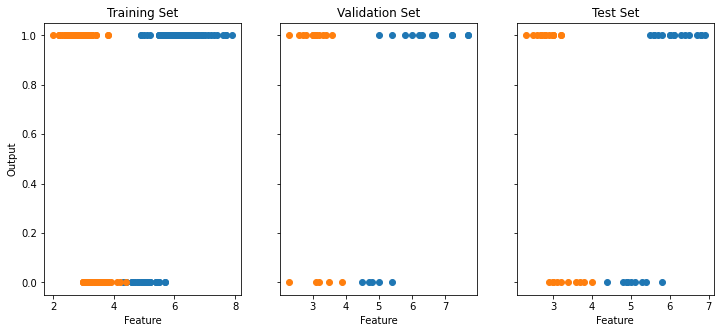

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
ax[0].scatter(X_training[:, 0], Y_training)
ax[0].scatter(X_training[:, 1], Y_training)
ax[0].set_xlabel("Feature")
ax[0].set_ylabel("Output")
ax[0].set_title("Training Set")
ax[1].scatter(X_validation[:, 0], Y_validation)
ax[1].scatter(X_validation[:, 1], Y_validation)
ax[1].set_xlabel("Feature")
ax[1].set_title("Validation Set")
ax[2].scatter(X_test[:, 0], Y_test)
ax[2].scatter(X_test[:, 1], Y_test)
ax[2].set_xlabel("Feature")
ax[2].set_title("Test Set")
plt.show()

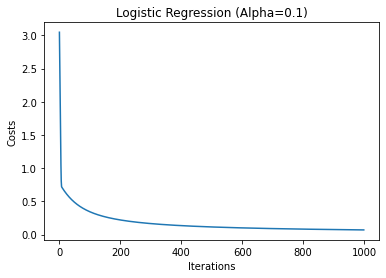

In [3]:
plt.plot(iterations, costs)
plt.title(f"Logistic Regression (Alpha={alpha})")
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.show()